In [1]:
from glob import glob
file_list=glob("D:/jupyter notebook/10 samples/*.wav")
for i,file in enumerate(file_list):
    print(f'{i}:{file}')

0:D:/jupyter notebook/10 samples\sample01.wav
1:D:/jupyter notebook/10 samples\sample02.wav
2:D:/jupyter notebook/10 samples\sample03.wav
3:D:/jupyter notebook/10 samples\sample04.wav
4:D:/jupyter notebook/10 samples\sample05.wav
5:D:/jupyter notebook/10 samples\sample06.wav
6:D:/jupyter notebook/10 samples\sample07.wav
7:D:/jupyter notebook/10 samples\sample08.wav
8:D:/jupyter notebook/10 samples\sample09.wav
9:D:/jupyter notebook/10 samples\sample10.wav


In [2]:
import IPython.display as ipd
ipd.Audio(file_list[0])

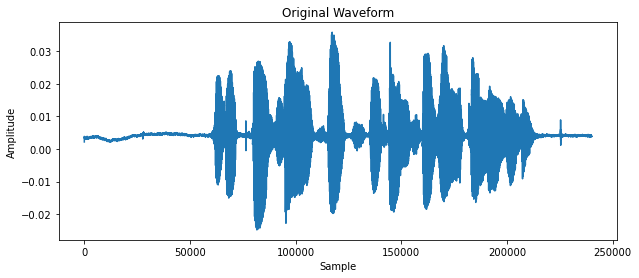

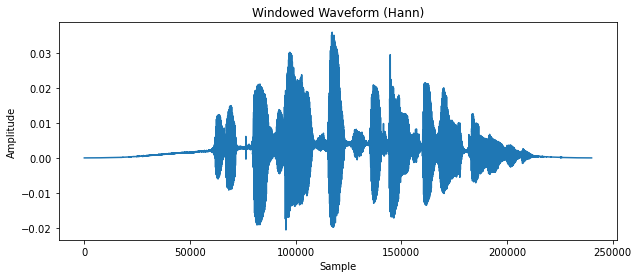

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Plot the original waveform
plt.figure(figsize=(10, 4))
plt.title('Original Waveform')
plt.plot(x)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Apply Hann windowing
windowed_data = x * np.hanning(len(x))

# Plot the windowed waveform
plt.figure(figsize=(10, 4))
plt.title('Windowed Waveform (Hann)')
plt.plot(windowed_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


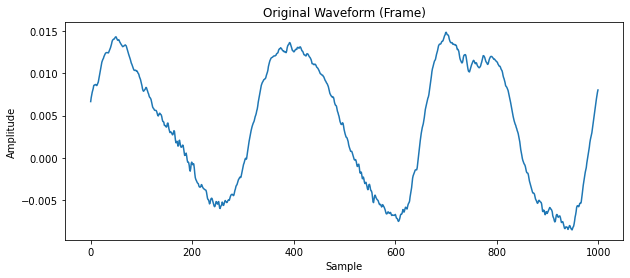

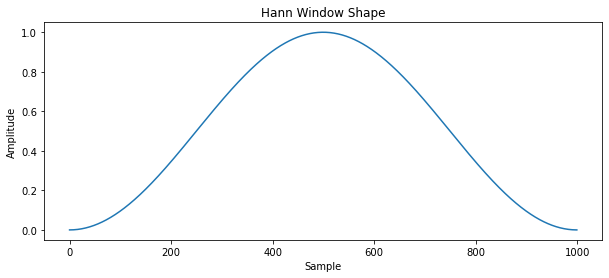

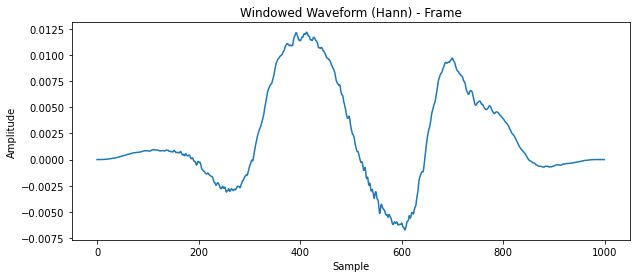

In [75]:
# Define the start and end sample indices for the frame you want to process
start_sample = 200000  # Adjust this value to your desired starting sample
end_sample = 201000    # Adjust this value to your desired ending sample

# Extract the selected frame
frame = x[start_sample:end_sample]

# Plot the original waveform for the selected frame
plt.figure(figsize=(10, 4))
plt.title('Original Waveform (Frame)')
plt.plot(frame)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Apply Hann windowing to the selected frame
window = np.hanning(len(frame))
windowed_frame = frame * window
# Plot the original Hann window shape
plt.figure(figsize=(10, 4))
plt.title('Hann Window Shape')
plt.plot(window)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Plot the windowed waveform for the selected frame
plt.figure(figsize=(10, 4))
plt.title('Windowed Waveform (Hann) - Frame')
plt.plot(windowed_frame)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()



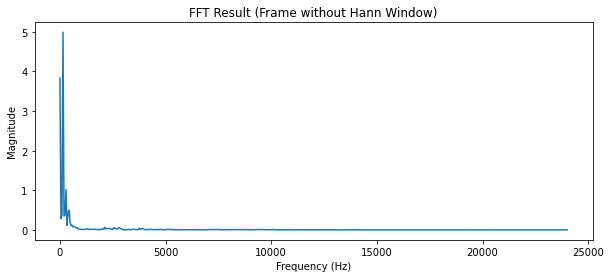

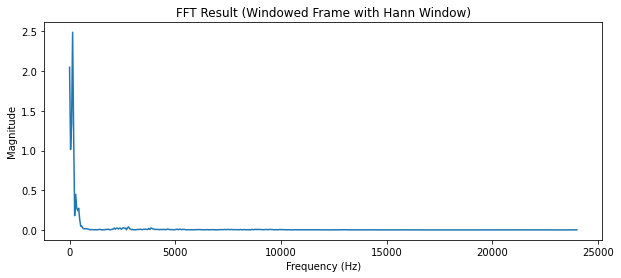

In [76]:
# Apply FFT to the frame without Hann window
fft_result = np.fft.fft(frame)
fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]  # Take the positive frequencies

# Apply FFT to the windowed frame (with Hann window)
fft_result_windowed = np.fft.fft(windowed_frame)
fft_magnitude_windowed = np.abs(fft_result_windowed)[:len(fft_result_windowed)//2]  # Take the positive frequencies
frequency_axis = np.linspace(0, sample_rate/2, len(fft_magnitude))

# Plot the FFT result for frame without Hann window
plt.figure(figsize=(10, 4))
plt.title('FFT Result (Frame without Hann Window)')
plt.plot(frequency_axis, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Plot the FFT result for windowed frame (with Hann window)
plt.figure(figsize=(10, 4))
plt.title('FFT Result (Windowed Frame with Hann Window)')
plt.plot(frequency_axis, fft_magnitude_windowed)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

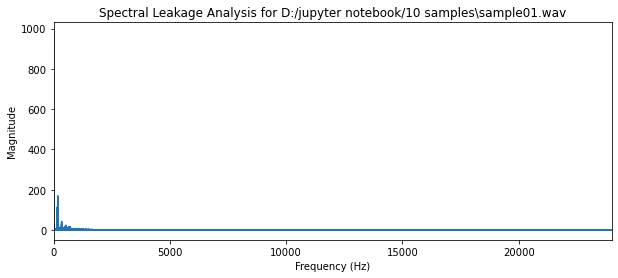

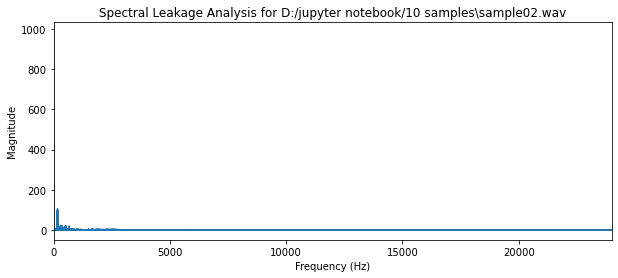

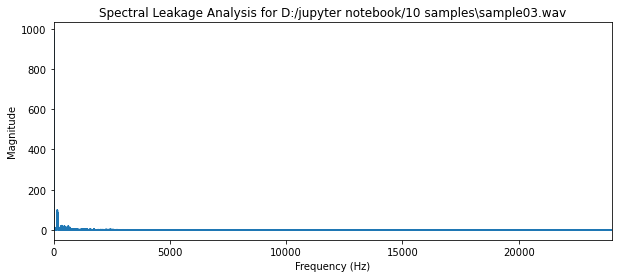

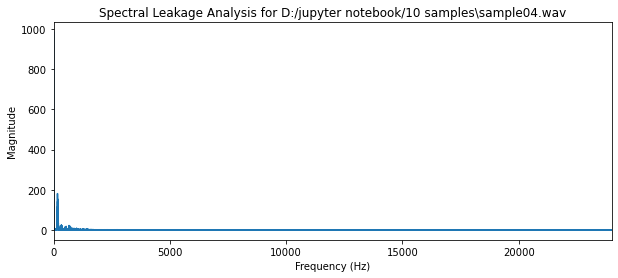

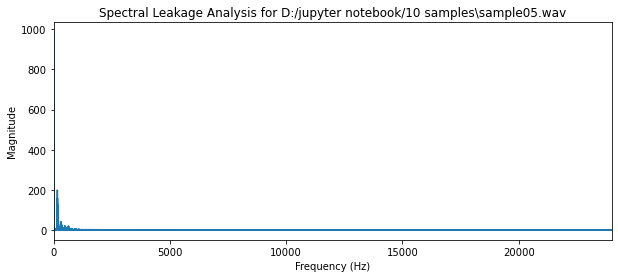

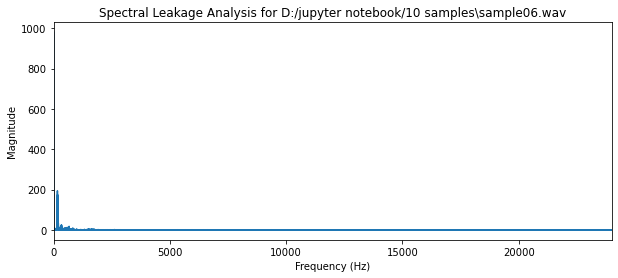

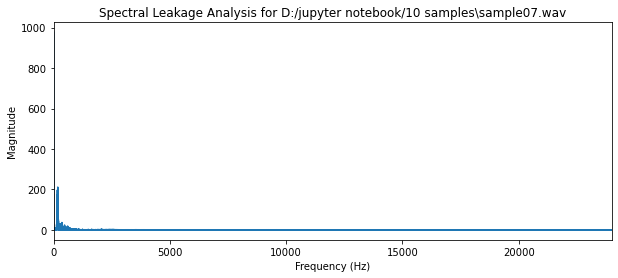

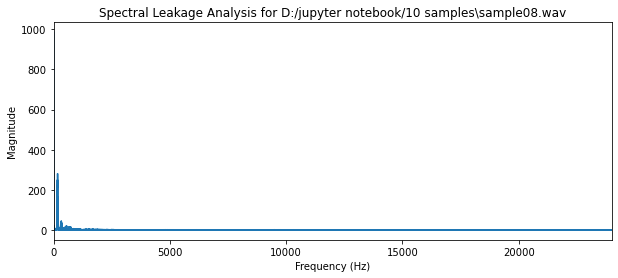

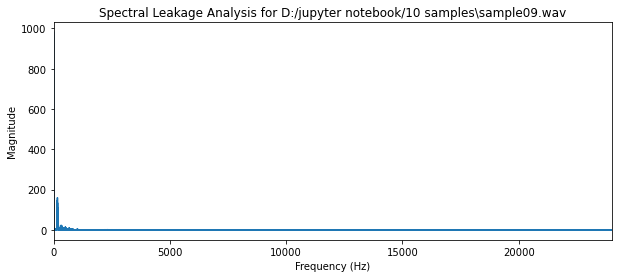

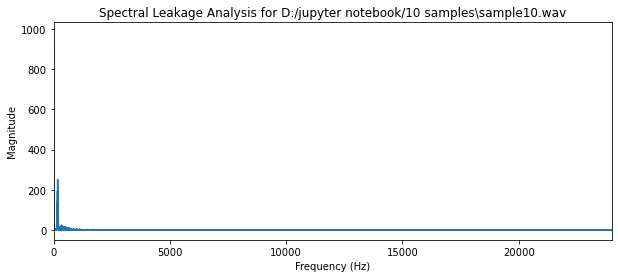

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

for i, file in enumerate(file_list):
    # Load the audio file
    sample_rate, audio_data = wavfile.read(file)
    
    # Apply FFT
    fft_result = np.fft.fft(audio_data)
    
    # Calculate the frequency bins
    frequency_bins = np.fft.fftfreq(len(fft_result), 1/sample_rate)
    
    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.title(f'Spectral Leakage Analysis for {file}')
    plt.plot(frequency_bins, np.abs(fft_result))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sample_rate/2)  # Displaying only positive frequencies
    plt.show()


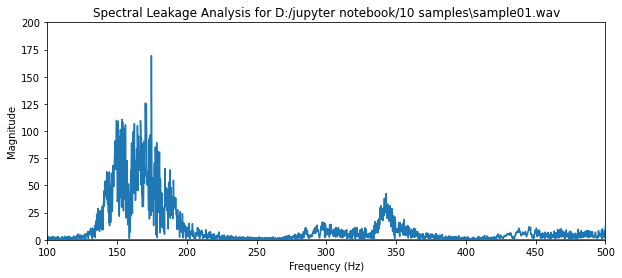

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Choose one file from file_list
file_path = file_list[0]

# Load the audio file
sample_rate, audio_data = wavfile.read(file_path)

# Apply FFT
fft_result = np.fft.fft(audio_data)

# Calculate the frequency bins
frequency_bins = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.title(f'Spectral Leakage Analysis for {file_path}')
plt.plot(frequency_bins, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate/2) 
plt.xlim(100, 500)
plt.ylim(0, 200)# Displaying only positive frequencies
plt.show()


In [20]:
import librosa

x, sr = librosa.load(file_list[0], sr=None)

In [33]:
from scipy.fft import fft
fft_result = np.fft.fft(x)

Text(0.5, 1.0, 'FFT Before Hann Window')

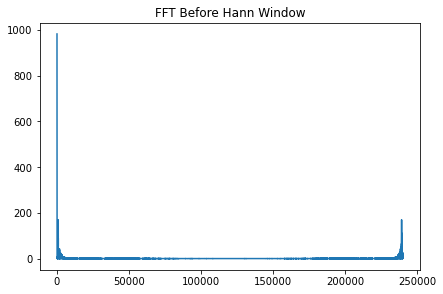

In [34]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(np.abs(fft_result))
plt.title('FFT Before Hann Window')

In [ ]:
from scipy.signal import hann
windowed_data = hann(len(x)) * x

# FFT after applying Hann window
fft_result_windowed = np.abs(fft(windowed_data))

# Define overlapping frames (you'll need to choose appropriate parameters)
frame_size = 1024
overlap = 512

# Calculate the number of frames
num_frames = len(x) // (frame_size - overlap)

# Initialize an array to store results after overlapping frames
fft_overlapping = np.zeros((num_frames, frame_size//2))

# Apply Hann window and FFT for overlapping frames
for i in range(num_frames):
    start = i * (frame_size - overlap)
    end = start + frame_size
    frame = hann(frame_size) * audio_data[start:end]
    fft_overlapping[i] = np.abs(fft(frame))[:frame_size//2]


In [37]:
from scipy.signal import hann
windowed_data = hann(len(x)) * x
windowed_data

array([0.00000000e+00, 6.64101762e-13, 2.30082519e-12, ...,
       2.63549067e-12, 6.74560058e-13, 0.00000000e+00])

In [38]:
# FFT after applying Hann window
fft_result_windowed = np.abs(fft(windowed_data))
fft_result_windowed

array([499.52139952, 247.93100827,   4.554186  , ...,   2.97023101,
         4.554186  , 247.93100827])

In [48]:
# Define overlapping frames (you'll need to choose appropriate parameters)
frame_size = 1024
overlap = 512

# Calculate the number of frames
num_frames = (len(audio_data) - overlap) // (frame_size - overlap)
num_frames

467

In [49]:
# Initialize an array to store results after overlapping frames
fft_overlapping = np.zeros((num_frames, frame_size//2))
fft_overlapping

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
for i in range(num_frames):
    start = i * (frame_size - overlap)
    end = start + frame_size
    frame = hann(frame_size) * audio_data[start:end]
    fft_overlapping[i] = np.abs(fft(frame))[:frame_size//2]

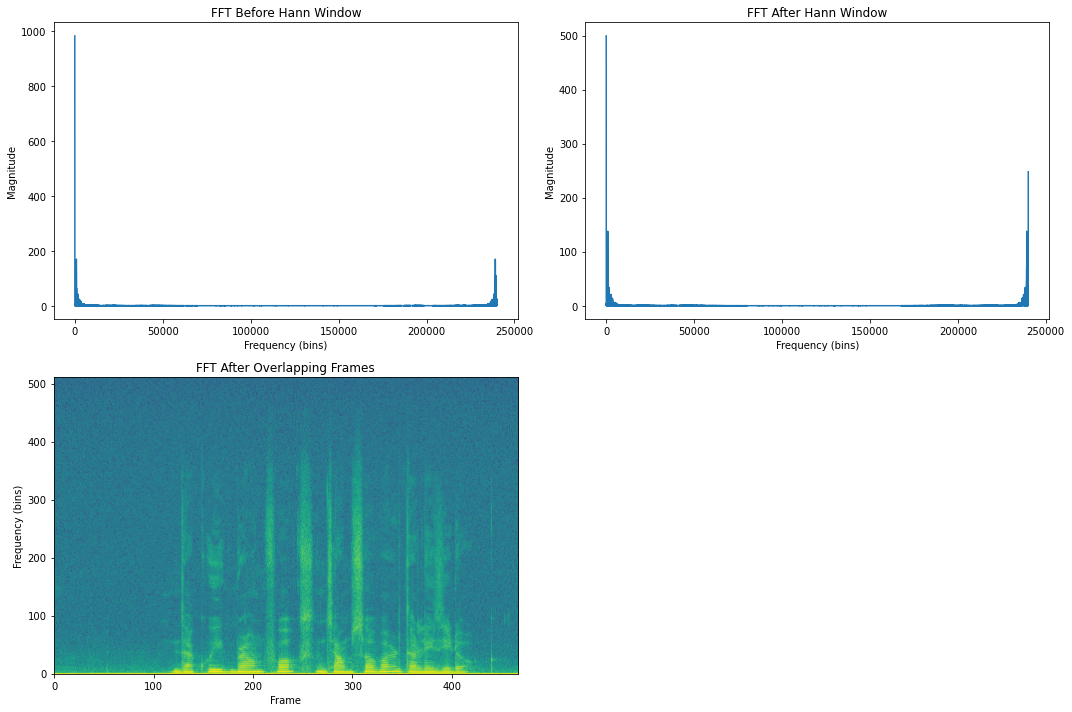

In [57]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(np.abs(fft_result))
plt.title('FFT Before Hann Window')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')

# Plot FFT after applying Hann window
plt.subplot(2, 2, 2)
plt.plot(fft_result_windowed)
plt.title('FFT After Hann Window')
plt.xlabel('Frequency (bins)')
plt.ylabel('Magnitude')

# Plot FFT after overlapping frames
plt.subplot(2, 2, 3)
plt.imshow(np.log(fft_overlapping.T), aspect='auto', origin='lower')
plt.title('FFT After Overlapping Frames')
plt.xlabel('Frame')
plt.ylabel('Frequency (bins)')

plt.tight_layout()
plt.show()


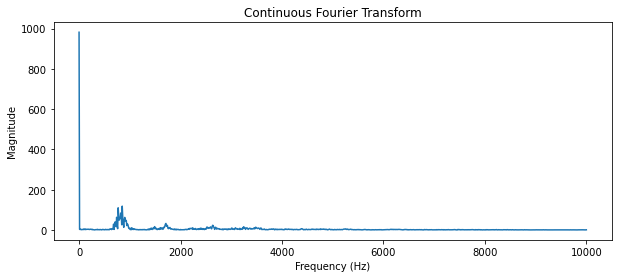

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(x, t, f):
    X = np.zeros(len(f), dtype=complex)
    for i, freq in enumerate(f):
        X[i] = np.trapz(x * np.exp(-2j * np.pi * freq * t))
    return X


# Define the time range and frequency range
t = np.linspace(0, 1, len(x))  # Adjust this according to your specific time range
f = np.linspace(0, 10000, 1000)  # Adjust this according to your specific frequency range

# Compute the Fourier Transform
X = fourier_transform(x, t, f)

# Plot the Fourier Transform
plt.figure(figsize=(10, 4))
plt.title('Continuous Fourier Transform')
plt.plot(f, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


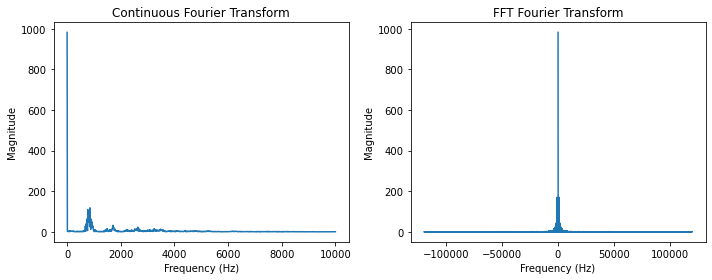

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(x, t, f):
    X = np.zeros(len(f), dtype=complex)
    for i, freq in enumerate(f):
        X[i] = np.trapz(x * np.exp(-2j * np.pi * freq * t))
    return X

# Assuming x is your audio data (an array of amplitudes)
# Assuming t is the time values corresponding to x
# Assuming f is an array of frequencies at which you want to compute the Fourier Transform

# Define the time range and frequency range
t = np.linspace(0, 1, len(x))  # Adjust this according to your specific time range
f = np.linspace(0, 10000, 1000)  # Adjust this according to your specific frequency range

# Compute the Fourier Transform using your function
X = fourier_transform(x, t, f)

# Compute the Fourier Transform using FFT
X_fft = np.fft.fft(x)

# Define the frequencies corresponding to FFT
f_fft = np.fft.fftfreq(len(x), t[1] - t[0])

# Plot the Fourier Transforms
plt.figure(figsize=(10, 4))

# Plot the Fourier Transform from your function
plt.subplot(121)
plt.title('Continuous Fourier Transform')
plt.plot(f, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the Fourier Transform from FFT
plt.subplot(122)
plt.title('FFT Fourier Transform')
plt.plot(f_fft, np.abs(X_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
